# **Implementation of a perceptron for logistic regression**

# 1. Imports
- **Numpy** for data processing (More precisely: speeds up the computation time with its vectorization functions)
- **h5py** for loading the dataset
- **matplotlib** to visualize a sample of images

In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

print('imported')

imported


# 2. Needed functions for prediction and learning

## 2.1 Normalizind data
### We try to keep weights in a small range by normalizing data and avoid getting an exploding gradient. In theory, it is not necessary to rescale the inputs as long as an appropriate definition of the weights compensates it. In the end, the most important is to guarantee a small range of your weight values.

In [ ]:
def norm_img(img):
    """
    normalize image to a [0, 1] range float32
    Args: image (ndarray): (64, 64, 3) image
    Returns: image (ndarray): [0, 255] -> [0, 1]
    """
    return (img / 255.0).astype(np.float32)

def denorm_img(img):
    """
    denormalize image to uint8
    Args: image (ndarray): (64, 64, 3) image
    Returns: image (ndarray): [0, 1] -> [0, 255]
    """
    return (img * 255).astype(np.uint8)

## 2.2 Weights initialization
### Practically, it's bad to initialize weights to zeros because of the symmetric activation problem. But since we're using a binary cross-entropy, the derivative of the cost with respect to output will be a convex function (see [Wikipedia](https://en.wikipedia.org/wiki/Convex_function)), and thus, weights will always converge to the minimum.

In [ ]:
def initialize_with_zeros(dim):
    """
    initialize weights with zeros
    Args: dim (number): dimension of weights
    Returns: (ndarray, ndarray): return weight matrix and bias vector
    """
    w = np.zeros((dim, 1))
    b = 0
    return w, b

## 2.3 Implementation of the single neuron model (Perceptron)

## 0. Activation functions
### Since the problem is a binary classification problem, we'll be using a $sigmoid$
### $$ \delta = sigmoid(x) = \frac{1}{1 + e^{-x}} $$
### $Heavyside$ function is a step function that acts like a threshold on the output data. returns 0 or 1 ($s$ parameter is set to 0)
### $$ H(x, s) = \begin{cases}1 & x > 0\\s & x = 0\\0 & x < 0\end{cases}$$

In [ ]:
def heavyside(x):
    return np.heaviside(x - 0.5, 0)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

## 1. Forward propagation
### $$ \theta =  \delta (w^{T}X + b) $$
### Where $\delta$ is the activation function and $W^{T}$ is the transpose of matrix W

In [ ]:
def forward_propagation(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return Z, A

## 2. Backward propagation
### Without going in-depth, here are the different functions used for the gradient descent :
$$  \frac{\partial J}{\partial w_{i}} =  \frac{\partial C}{\partial \delta}\frac{\partial \delta}{\partial Z} \frac{\partial Z}{\partial w_{i}} $$
$$ \frac{\partial J}{\partial Z} = \theta - Y = dZ$$
$$ \frac{\partial J}{\partial w_{i}} = \frac{1}{m} X dZ^{T} = dW$$
$$ \frac{\partial J}{\partial b} =  \frac{1}{m} \sum_i^m dZ^{(i)} = db$$

### Where $J$ is the cost function, $m$ the number of training examples and $w_{i}$ the i-th weight of the neuron.

In [ ]:
def backward_propagation(A, X, Y):
    m = X.shape[1]
    dz = A - Y
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    return dw, db

## 3. Weights update
### One required parameter before updating the weights is the learning rate, annotated $\eta$. This parameter has an impact on the training speed. A substantial value means faster learning but can sometimes cause oscillations.
$$ w_{i} = w_{i} - \eta \times dW_{i} $$
$$ b = b - \eta \times db $$

In [ ]:
def update_weights(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

## 4. Loss and cost functions
### The loss function is a binary cross-entropy loss, which is the best function we can use for a logistic regression problem. Its body is defined like this :
$$ \mathcal{L}(\theta^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\theta^{(i)}) - (1-y^{(i)} )  \log(1-\theta^{(i)})\tag{3}$$
### The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_i^m \mathcal{L}(\theta^{(i)}, y^{(i)})\tag{6}$$

In [ ]:
def binary_cross_entropy(A, Y):
    return -(Y * np.log(A) + (1 - Y) * np.log(1 - A))

def cost(A, Y):
    m = Y.shape[1]
    return (-1 / m) * np.sum(binary_cross_entropy(A, Y))

def cost(w, b, X, Y):
    m = X.shape[1]
    Z, A = forward_propagation(w, b, X)
    c = cost(A, Y)
    return (1 / m) * c 

## 5. Training
### Training is constituted of 2 phases: forward propagation followed by a backward propagation in which we compute all the gradients and then update the weights. We repeat this process $it$ times, where $it$ is an empirical parameter.
### Training the model for too long can cause an over-fitting, a state where the model cannot generalize and predicts only training data. See [overfitting](https://en.wikipedia.org/wiki/Overfitting) and [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias–variance_tradeoff).

In [17]:
def train(w, b, X, Y, lr, it):
    costs = []
    for i in range(it):
        Z, A = forward_propagation(w, b, X)
        c = cost(w, b, X, Y)
        dw, db = backward_propagation(A, X, Y)
        w, b = update_weights(w, b, dw, db, lr)
        if i % 10 == 0:
            costs.append(c)
            print('cost : {}'.format(c))
    return costs, w, b

## 6. Prediction function
### A simple forward propagation of $X$ followed by a $Heavyside$ function, which is a step function that acts as a threshold for the model's output, gives us 0 or 1 as output.

In [ ]:
def predict(w, b, X):
    Z, A = forward_propagation(w, b, X)
    return heavyside(A)

# 3. Loading dataset

In [6]:
train_h5 = h5py.File('datasets/train_catvnoncat.h5', 'r')
train_x = np.array(train_h5['train_set_x'])
train_x = train_x.reshape((train_x.shape[0], -1)).T
train_y = np.array(train_h5['train_set_y'])
train_y = np.expand_dims(train_y, axis=0)

test_h5 = h5py.File('datasets/test_catvnoncat.h5', 'r')
test_x = np.array(test_h5['test_set_x'])
test_x = test_x.reshape((test_x.shape[0], -1)).T
test_y = np.array(test_h5['test_set_y'])
test_y = np.expand_dims(test_y, axis=0)

# getting classes tags
classes = np.array(test_h5['list_classes'])

print('train shape : {}, {}'.format(train_x.shape, train_y.shape))
print('test shape : {}, {}'.format(test_x.shape, test_y.shape))
print('Classes are : {}'.format(' '.join([c for c in classes.astype('str')])))

train shape : (12288, 209), (1, 209)
test shape : (12288, 50), (1, 50)
Classes are : non-cat cat


# 4. Some examples

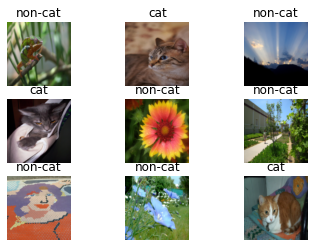

In [22]:
random_indexes = np.random.randint(train_x.shape[-1], size=9)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title('cat' if train_y[:, random_indexes[i]] == 1 else 'non-cat')
    plt.imshow(train_x[:, random_indexes[i]].reshape(64, 64, 3))
plt.show()

# 5. Training weights

In [87]:
train_x = norm_img(train_x)
test_x = norm_img(test_x)
w, b = initialize_with_zeros(train_x.shape[0])
c, w, b = train(w, b, train_x, train_y, lr=0.001, iterations=5000)

cost : 0.6931471805599453
cost : 0.6436544764306668
cost : 0.6357022644565815
cost : 0.6285287548750871
cost : 0.6219914005042768
cost : 0.6159787927032997
cost : 0.6104035003481222
cost : 0.6051965246136728
cost : 0.6003030415772659
cost : 0.5956791549412396
cost : 0.591289426000354
cost : 0.5871049949968137
cost : 0.5831021497499033
cost : 0.5792612317120299
cost : 0.5755657965443468
cost : 0.5720019669638106
cost : 0.5685579312221652
cost : 0.5652235522714014
cost : 0.5619900613937395
cost : 0.5588498165714882
cost : 0.5557961107127088
cost : 0.5528230184605533
cost : 0.5499252730158185
cost : 0.5470981664291816
cost : 0.5443374683454683
cost : 0.541639359335234
cost : 0.5390003758234179
cost : 0.5364173642907247
cost : 0.533887442932518
cost : 0.5314079693508156
cost : 0.5289765131562365
cost : 0.5265908325898953
cost : 0.5242488544564551
cost : 0.5219486568009712
cost : 0.519688453872999
cost : 0.5174665830086871
cost : 0.5152814931305563
cost : 0.5131317346194293
cost : 0.5110159

# 6. Tests
### 74% is the best of what I could get from a single neuron model

In [88]:
predict_y = predict(w, b, test_x)
print('accuracy : {} %'.format(np.mean(test_y == predict_y) * 100))

accuracy : 74.0 %
